<a href="https://colab.research.google.com/github/jmgang/G2Sprint3D4Activity/blob/master/Sen_Copy_Mainstay_Tracks_of_D4_Lab_Grp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 4- Lab Activity
##  Classifying tracks according to streaming patterns

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

# pd.set_option('display.max_rows',999)

In [94]:
# # Mount GDrive folders
# from google.colab import drive
# drive.mount('/content/drive')

In [95]:
# # Set home directory
# import os
# home_dir = "/content/drive/MyDrive/Colab Notebooks/Sprint 3/" # insert your home directory here
# os.chdir(home_dir)

#### Data Preparation

In [96]:
# read and process the charts dataset
# df = pd.read_csv('data/ph_spotify_daily_charts.csv')
df = pd.read_csv('https://raw.githubusercontent.com/jmgang/G2Sprint3D4Activity/master/ph_spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


## Instructions

A track may be classified as follows:

   - **Mainstay** - Track with high streams ($>X_1$ streams) and position ($>P_1$ position) all throughout the year
   - **Viral** - Track that reach the peak positions fast with high increase in streams ($>X_2$ streams/day),
     followed by a rapid decline in position ($P_2$ positions/day) and streams ($>X_3$ streams/day)
   - **Seasonal** - Track that garner considerable streams ($>X_4$ streams) within a certain season (between $T_1$ and $T_2$) and go into low ranks/ disappear from the chart after the season
    
   a. Discuss among your group how you would define and set values to the thresholds ($X_1$,$P_1$,$X_2$,$P_2$,$X_3$,$T_1$,$T_2$,$X_4$) that you will use to classify the tracks according to the categories as described above. (You may add more thresholds to refine the definitions, as you see fit).
   
   b. Using your group's definition in (a) name as many tracks as you can per classification and plot their streams and position as a time series.

   c. Prepare a 5 min presentation (3-4 slides) showing your definition and thresholds for each category and some sample tracks that you classified under each.

# Finding Mainstay Tracks

## In 2022 only

In [97]:
df_22 = df[df.index.year == 2022]


In [98]:
df_22.describe()

,position,streams
count,73001.000000,7.300100e+04
mean,100.500130,8.148018e+04
std,57.734316,5.862061e+04
min,1.000000,2.178200e+04
25%,51.000000,4.495800e+04
50%,101.000000,5.996600e+04
75%,150.000000,9.623800e+04
max,200.000000,1.095809e+06


In [99]:
df_22.median()

<ipython-input-99-29e9a0ed15d9>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_22.median()


position      101.0
streams     59966.0
dtype: float64

In [100]:
df_22.position.quantile(0.25), df_22.streams.quantile(0.75)

(51.0, 96238.0)

In [101]:
df_22[df_22.position <= df_22.position.median()]

,position,track_id,track_name,artist,streams
date,,,,,
2022-01-01,1,08MFgEQeVLF37EyZ7jcwLc,Pano,Zack Tabudlo,252262
2022-01-01,2,34YfLWuoxLEcvJQNxdI9P2,Pagsamo,Arthur Nery,244234
2022-01-01,3,63bmIgH9sS6sX5Sc7MetGq,Habang Buhay,Zack Tabudlo,242461
2022-01-01,4,16iRlyUMJVPqz62DlomMre,Ikaw Lang,NOBITA,201543
2022-01-01,5,5Hm2MJQ4ECvQmH5QWCMQrR,Paraluman,Adie,178511
...,...,...,...,...,...
2022-12-31,97,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Mariah Carey,94468
2022-12-31,98,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,Steve Lacy,93985
2022-12-31,99,68HocO7fx9z0MgDU0ZPHro,Every Summertime,NIKI,93526


In [102]:
P1 = df_22.position.quantile(0.25)
X1 = df_22.streams.quantile(0.75)
P1, X1

(51.0, 96238.0)

In [103]:
top200_df = df_22.pivot_table(index=['track_id', 'artist', 'track_name'], values='position', aggfunc='count').sort_values(by='position', ascending=False)
display(top200_df)

,,,position
track_id,artist,track_name,
4iRRAvxPPWXQp3mV1rAbPF,NOBITA,Unang Sayaw,365
1u8c2t2Cy7UBoG4ArRcF5g,Taylor Swift,Blank Space,365
55RMhrPQYA6vLu5YMgXxFD,Zack Tabudlo,Binibini,365
4SqWKzw0CbA05TGszDgMlc,The Walters,I Love You So,365
2eAvDnpXP5W0cVtiI0PUxV,Ruth B.,Dandelions,365
...,...,...,...
6VsvKPJ4xjVNKpI8VVZ3SV,Taylor Swift,invisible string,1
1HWAmrrXx7JdNyUEvaJDGX,Orange & Lemons,Heaven Knows - This Angel Has Flown,1
6YJdPrH3i2POzu7hdHIRrb,Ariana Grande,Santa Baby,1


In [104]:
mainstay_candidates_df = top200_df[top200_df.position == top200_df.position.max()]
display(mainstay_candidates_df)

,,,position
track_id,artist,track_name,
4iRRAvxPPWXQp3mV1rAbPF,NOBITA,Unang Sayaw,365
1u8c2t2Cy7UBoG4ArRcF5g,Taylor Swift,Blank Space,365
55RMhrPQYA6vLu5YMgXxFD,Zack Tabudlo,Binibini,365
4SqWKzw0CbA05TGszDgMlc,The Walters,I Love You So,365
2eAvDnpXP5W0cVtiI0PUxV,Ruth B.,Dandelions,365
0HZ3OUVrGHxttD2EuHqRm3,Hale,The Day You Said Goodnight,365
4JSDhJVmo2UqdF7nxbyenn,Hale,Kung Wala Ka,365
5l9g7py8RCblcvbZgGQgSd,Ben&Ben,Pagtingin,365
5F1ZmucV0uJY14y2dYKePa,Joji,Sanctuary,365


In [105]:
mainstay_candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31 entries, ('4iRRAvxPPWXQp3mV1rAbPF', 'NOBITA', 'Unang Sayaw') to ('2LBqCSwhJGcFQeTHMVGwy3', 'The Weeknd', 'Die For You')
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   position  31 non-null     int64
dtypes: int64(1)
memory usage: 17.7+ KB


In [106]:
top200_track_ids = set(mainstay_candidates_df.index.get_level_values(0))
len(top200_track_ids)

31

In [107]:
mainstay_df = df_22[(df_22.track_id.isin(top200_track_ids)) & (df_22.position <= P1) & (df_22.streams >= X1)]
display(mainstay_df.sort_values(by='position'))

,position,track_id,track_name,artist,streams
date,,,,,
2022-01-01,1,08MFgEQeVLF37EyZ7jcwLc,Pano,Zack Tabudlo,252262
2022-02-06,1,08MFgEQeVLF37EyZ7jcwLc,Pano,Zack Tabudlo,296172
2022-02-07,1,08MFgEQeVLF37EyZ7jcwLc,Pano,Zack Tabudlo,317615
2022-02-08,1,08MFgEQeVLF37EyZ7jcwLc,Pano,Zack Tabudlo,315033
2022-02-09,1,08MFgEQeVLF37EyZ7jcwLc,Pano,Zack Tabudlo,310660
...,...,...,...,...,...
2022-09-14,51,3afkJSKX0EAMsJXTZnDXXJ,Strawberries & Cigarettes,Troye Sivan,101160
2022-12-02,51,3Eb5sztvEMa0Mqnb8DUAlU,Come Inside Of My Heart,IV Of Spades,111412
2022-11-30,51,5F1ZmucV0uJY14y2dYKePa,Sanctuary,Joji,106765


In [108]:
mainstay_track_ids = mainstay_df.track_id.unique().tolist()

In [109]:
df_22['is_mainstay'] = df_22.track_id.apply(lambda id : True if id in mainstay_track_ids else False)
display(df_22)

,position,track_id,track_name,artist,streams,is_mainstay
date,,,,,,
2022-01-01,1,08MFgEQeVLF37EyZ7jcwLc,Pano,Zack Tabudlo,252262,True
2022-01-01,2,34YfLWuoxLEcvJQNxdI9P2,Pagsamo,Arthur Nery,244234,False
2022-01-01,3,63bmIgH9sS6sX5Sc7MetGq,Habang Buhay,Zack Tabudlo,242461,True
2022-01-01,4,16iRlyUMJVPqz62DlomMre,Ikaw Lang,NOBITA,201543,True
2022-01-01,5,5Hm2MJQ4ECvQmH5QWCMQrR,Paraluman,Adie,178511,False
...,...,...,...,...,...,...
2022-12-31,196,0Q5VnK2DYzRyfqQRJuUtvi,LOVE DIVE,IVE,60322,False
2022-12-31,197,1Fid2jjqsHViMX6xNH70hE,Atlantis,Seafret,60022,False
2022-12-31,198,3ueq4reab02CypseErxvwS,Rainbow,South Border,59854,False


## All years 2017-2023

In [110]:
df_all = df.copy()

In [111]:
df_all.describe()

,position,streams
count,495798.000000,4.957980e+05
mean,100.499786,6.548559e+04
std,57.734382,5.774199e+04
min,1.000000,1.100400e+04
25%,50.250000,2.962600e+04
50%,100.000000,4.423900e+04
75%,150.000000,8.135075e+04
max,200.000000,1.644340e+06


In [112]:
df_all.median()

<ipython-input-112-13294d896614>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_all.median()


position      100.0
streams     44239.0
dtype: float64

In [113]:
df_all.position.quantile(0.25), df_all.streams.quantile(0.75)

(50.25, 81350.75)

In [114]:
df_all[df_all.position <= df_all.position.median()]

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656
...,...,...,...,...,...
2023-10-15,96,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,Bruno Mars,121546
2023-10-15,97,5xwBIieMMFUmLDgvG4DjFe,Fall In Love Alone,Stacey Ryan,119825
2023-10-15,98,5f9808hpiCpuNyqqdXmpF2,Buwan,juan karlos,118090


In [115]:
P1 = df_all.position.quantile(0.25)
X1 = df_all.streams.quantile(0.75)
P1, X1

(50.25, 81350.75)

In [116]:
top200_df = df_all.pivot_table(index=['track_id', 'artist', 'track_name'], values='position', aggfunc='count').sort_values(by='position', ascending=False)
display(top200_df)

,,,position
track_id,artist,track_name,
5uCax9HTNlzGybIStD3vDh,James Arthur,Say You Won't Let Go,2476
135ggzbjOogZ75IQ0LQi8r,Eraserheads,Ang Huling El Bimbo,2275
4JSDhJVmo2UqdF7nxbyenn,Hale,Kung Wala Ka,2227
3WUEs51GpcvlgU7lehLgLh,Ben&Ben,Kathang Isip,2127
7BqBn9nzAq8spo5e7cZ0dJ,Bruno Mars,Just the Way You Are,2087
...,...,...,...
3ojTJaonfkL96iIWa47SU3,Chris Brown,Questions,1
56Ialc7EjXQwdZWLIctijx,SEVENTEEN,I Wish,1
1TEEi8aHzb4tGcLJdsepb1,BTS,My Time,1


In [117]:
K1 = 1500
mainstay_candidates_df = top200_df[top200_df.position >= K1]
display(mainstay_candidates_df)

,,,position
track_id,artist,track_name,
5uCax9HTNlzGybIStD3vDh,James Arthur,Say You Won't Let Go,2476
135ggzbjOogZ75IQ0LQi8r,Eraserheads,Ang Huling El Bimbo,2275
4JSDhJVmo2UqdF7nxbyenn,Hale,Kung Wala Ka,2227
3WUEs51GpcvlgU7lehLgLh,Ben&Ben,Kathang Isip,2127
7BqBn9nzAq8spo5e7cZ0dJ,Bruno Mars,Just the Way You Are,2087
6wdCelHrPh7UfliNjwRTUv,Ben&Ben,Leaves,2084
4u8RkgV6P4TLi89SmlUtv8,IV Of Spades,Mundo,2070
6fxVffaTuwjgEk5h9QyRjy,Ed Sheeran,Photograph,2059
3OpGUlDmRUXh0NkIYWoIlD,Parokya Ni Edgar,Your Song,1947


In [118]:
mainstay_candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27 entries, ('5uCax9HTNlzGybIStD3vDh', 'James Arthur', "Say You Won't Let Go") to ('2BgEsaKNfHUdlh97KmvFyo', 'Anne-Marie', '2002')
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   position  27 non-null     int64
dtypes: int64(1)
memory usage: 78.4+ KB


In [119]:
top200_track_ids = set(mainstay_candidates_df.index.get_level_values(0))
len(top200_track_ids)

27

In [120]:
mainstay_df = df_all[(df_all.track_id.isin(top200_track_ids)) & (df_all.position <= P1) & (df_all.streams >= X1)]
display(mainstay_df.sort_values(by='position'))

,position,track_id,track_name,artist,streams
date,,,,,
2018-03-20,1,4u8RkgV6P4TLi89SmlUtv8,Mundo,IV Of Spades,234264
2018-10-06,1,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,247552
2018-10-05,1,1yDiru08Q6omDOGkZMPnei,Maybe The Night,Ben&Ben,250183
2018-10-04,1,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,252292
2018-10-03,1,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,251114
...,...,...,...,...,...
2022-02-09,50,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,83100
2022-01-22,50,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,81736
2022-01-21,50,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,86754


In [121]:
display(mainstay_df.sort_values(by='streams', ascending=False))

,position,track_id,track_name,artist,streams
date,,,,,
2019-02-05,2,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,287663
2019-02-01,1,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,285912
2019-02-13,2,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,284787
2018-10-29,2,0Eqg0CQ7bK3RQIMPw1A7pl,Malibu Nights,LANY,283728
2018-10-31,2,0Eqg0CQ7bK3RQIMPw1A7pl,Malibu Nights,LANY,283017
...,...,...,...,...,...
2021-09-05,37,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,81393
2020-08-16,24,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,81378
2020-01-15,49,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,81372


In [122]:
mainstay_track_ids = mainstay_df.track_id.unique().tolist()
len(mainstay_track_ids)

20

In [123]:
df_all['is_mainstay'] = df_all.track_id.apply(lambda id : True if id in mainstay_track_ids else False)
display(df_all)

,position,track_id,track_name,artist,streams,is_mainstay
date,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,False
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,True
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,False
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,False
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,False
...,...,...,...,...,...,...
2023-10-15,196,6wdCelHrPh7UfliNjwRTUv,Leaves,Ben&Ben,80569,True
2023-10-15,197,3afkJSKX0EAMsJXTZnDXXJ,Strawberries & Cigarettes,Troye Sivan,80407,False
2023-10-15,198,4xqrdfXkTW4T0RauPLv3WA,Heather,Conan Gray,80398,False


In [124]:
def plot_top_mainstay_streams(df):
    # Filter the dataframe for only mainstay songs
    mainstay_df = df[df.is_mainstay]

    # Get the top 5 unique tracks based on total streams
    top_5_tracks = mainstay_df.groupby('track_id').streams.sum().nlargest(5).index

    plt.figure(figsize=(15, 8))

    # For each track in the top 5 tracks, plot its time series streams
    for track_id in top_5_tracks:
        track_df = mainstay_df[mainstay_df.track_id == track_id]
        track_df = track_df.asfreq('D')

        # Interpolate missing stream values
        track_df = track_df.interpolate(method='linear')

        # Apply 7-day rolling window
        rolling_window = track_df['streams'].rolling(window=7).mean()

        track_name = track_df.track_name.iloc[0]  # get the track name
        artist = track_df.artist.iloc[0]          # get the artist name

        # Plot the 7-day rolling window over time for this track
        plt.plot(rolling_window.index, rolling_window, label=f"{track_name} by {artist}")

    plt.title("Top 5 Mainstay Tracks Over Time by Streams (7-day Rolling Window)")
    plt.xlabel("Date")
    plt.ylabel("Streams")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [125]:
def plot_top_mainstay_positions(df):
    # Filter the dataframe for only mainstay songs
    mainstay_df = df[df.is_mainstay]

    # Get the top 5 unique tracks based on total days in top positions
    # We will consider the sum of their inverse positions (so a song in 1st place gets more weight than 2nd place)
    top_5_tracks = mainstay_df.groupby('track_id').position.apply(lambda x: (1 / x).sum()).nlargest(5).index

    plt.figure(figsize=(15, 8))

    # For each track in the top 5 tracks, plot its time series positions with 7-day rolling
    for track_id in top_5_tracks:
        track_df = mainstay_df[mainstay_df.track_id == track_id]

        # Ensure the DataFrame's index is a date type for the frequency assignment
        if not isinstance(track_df.index, pd.DatetimeIndex):
            track_df.index = pd.to_datetime(track_df.index)

        track_df = track_df.asfreq('D')
        track_df = track_df.interpolate(method='linear')

        # Apply 7-day rolling window
        rolling_window = track_df['position'].rolling(window=7).mean()

        track_name = track_df.track_name.iloc[0]  # get the track name
        artist = track_df.artist.iloc[0]          # get the artist name

        # Plot the 7-day rolling window of positions over time for this track
        plt.plot(rolling_window.index, rolling_window, label=f"{track_name} by {artist}")

    plt.title("Top 5 Mainstay Positions Over Time (7-day Rolling Window)")
    plt.xlabel("Date")
    plt.ylabel("Position")
    plt.gca().invert_yaxis()  # Invert y-axis so position 1 is at the top
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

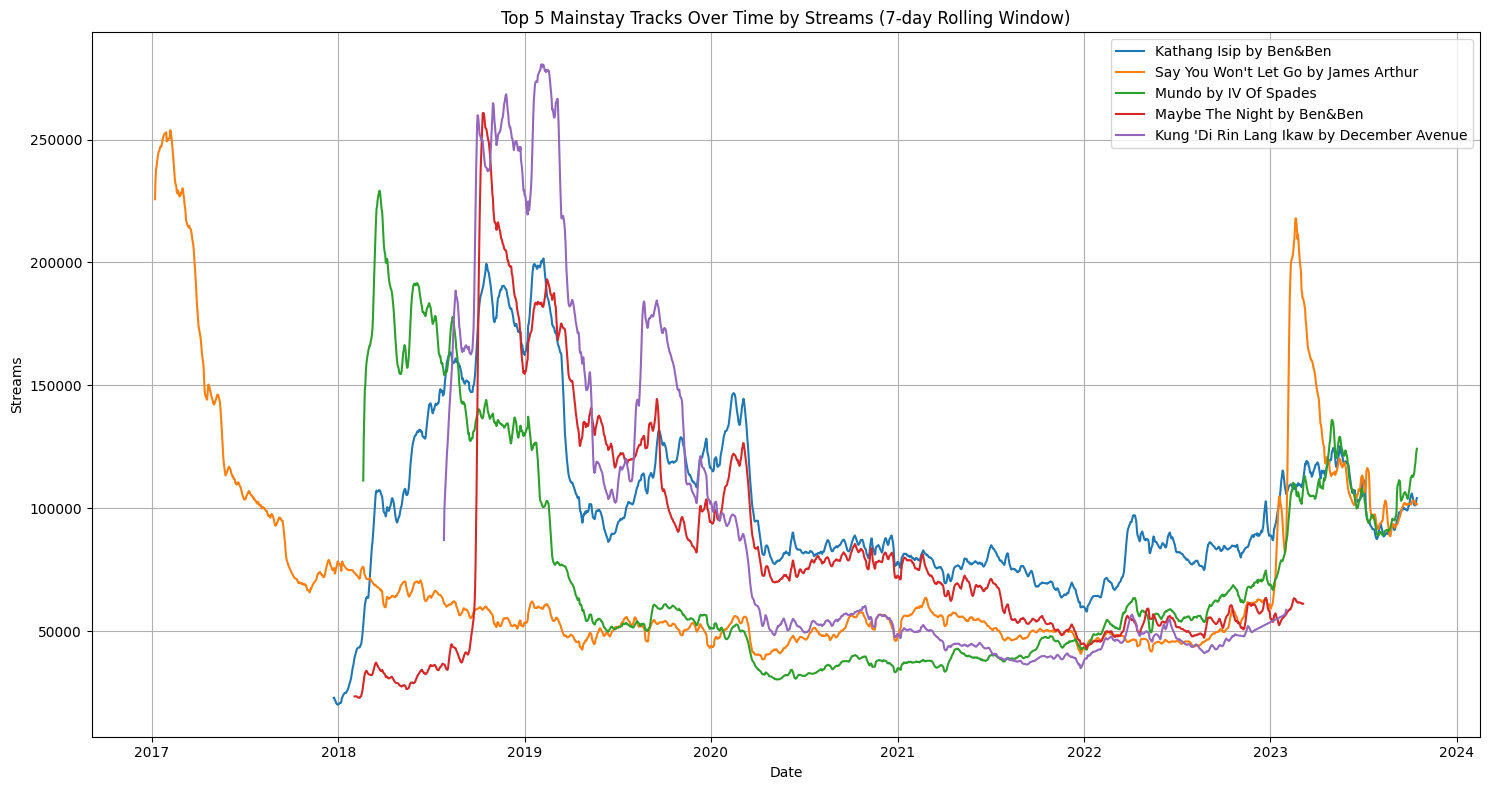

In [126]:
plot_top_mainstay_streams(df_all)

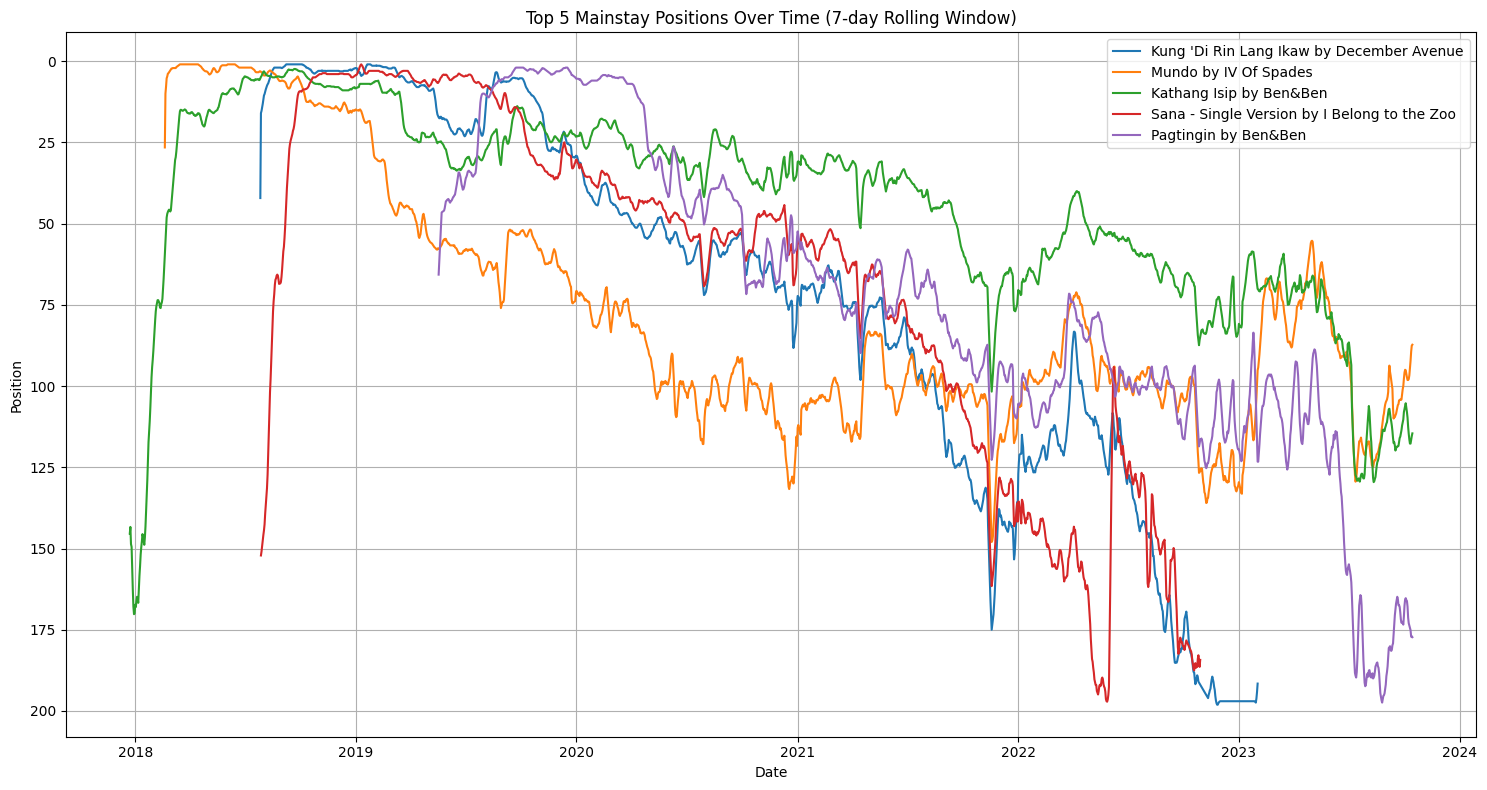

In [127]:
plot_top_mainstay_positions(df_all)

# Finding the Viral Tracks (WIP)

In [18]:
df_22.median()

<ipython-input-18-29e9a0ed15d9>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_22.median()


position         101.0
streams        59966.0
is_mainstay        0.0
dtype: float64

In [24]:
top200_viral_df = df_22.pivot_table(values='position', index=['track_id','artist','track_name'], aggfunc='min').sort_values(by='position')
display(top200_viral_df)

,,,position
track_id,artist,track_name,
7zjECGi00rudm6tSNJkSi1,Nica del Rosario,Rosas,1
47sq83n5WN22ZzYnGn8aTy,Adie,Mahika,1
769Ld8demNhMgVLAQcjTDn,anees,sun and moon,1
08MFgEQeVLF37EyZ7jcwLc,Zack Tabudlo,Pano,1
3hUxzQpSfdDqwM3ZTFQY0K,Taylor Swift,august,1
...,...,...,...
74NI58MQexwZjNu1Gu6GjT,SZA,Far,200
5Ek40FyMPprcvtyZDjqylX,TWICE,What is Love?,200
0en1kxNAvVQxLpbteRTG7L,Rob Deniel,Ulap,200


In [21]:
X2 = 50000 # high increase in streams/day
P2 = -20  # dropping P2 positions/day
X3 = -10000  # decreasing X3 streams/day

In [27]:
top200_viral_df.median()

position    87.0
dtype: float64

In [29]:
viral_candidates_df = top200_viral_df[top200_viral_df.position <= top200_viral_df.position.median()]
display(viral_candidates_df)

,,,position
track_id,artist,track_name,
7zjECGi00rudm6tSNJkSi1,Nica del Rosario,Rosas,1
47sq83n5WN22ZzYnGn8aTy,Adie,Mahika,1
769Ld8demNhMgVLAQcjTDn,anees,sun and moon,1
08MFgEQeVLF37EyZ7jcwLc,Zack Tabudlo,Pano,1
3hUxzQpSfdDqwM3ZTFQY0K,Taylor Swift,august,1
...,...,...,...
0GjEhVFGZW8afUYGChu3Rr,ABBA,Dancing Queen,87
3jiKUMXqwEodB7gVv1RMZU,Bruno Mars,After Last Night (with Thundercat & Bootsy Collins),87
7z84Fwf1R3Z2BwHCP620CI,Paramore,This Is Why,87


**CHALLENGE:** What percentage of Spotify charts streams from 2017-2023 are from mainstay tracks? viral tracks? seasonal tracks? tracks that do not belong in any of these categories? What does this reveal about the streaming market?

In [ ]:
# Code here

*Submit this notebook at the end of class time*